## Modified version Ch2 [Deep Learning with Python, Third Edition](https://www.manning.com/books/deep-learning-with-python-third-edition) notebook.

In [1]:
!pip install keras keras-hub --upgrade -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 37.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 947.9/947.9 kB 29.6 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
keras-nlp 0.21.1 requires keras-hub==0.21.1, but you have keras-hub 0.22.1 which is incompatible.


In [2]:
import os
os.environ["KERAS_BACKEND"] = "tensorflow"

In [3]:
# @title
import os
from IPython.core.magic import register_cell_magic

@register_cell_magic
def backend(line, cell):
    current, required = os.environ.get("KERAS_BACKEND", ""), line.split()[-1]
    if current == required:
        get_ipython().run_cell(cell)
    else:
        print(
            f"This cell requires the {required} backend. To run it, change KERAS_BACKEND to "
            f"\"{required}\" at the top of the notebook, restart the runtime, and rerun the notebook."
        )

### Data Structures Structure for ML

#### Scalars (rank-0 tensors)

In [29]:
import numpy as np

x = np.array(12)
x

array(12)

In [30]:
# prints the number of dimensions
x.ndim

0

#### Vectors (rank-1 tensors)

In [31]:
# creates and stores an array in a variable
x = np.array([12, 3, 6, 14, 7])
x

array([12,  3,  6, 14,  7])

In [32]:
# prints the number of dimensions
x.ndim

1

#### Matrices (rank-2 tensors)

In [33]:
x = np.array([[5, 78, 2, 34, 0],
              [6, 79, 3, 35, 1],
              [7, 80, 4, 36, 2]])
# prints number of dimensions
x.ndim

2

#### Rank-3 tensors and higher-rank tensors

In [35]:
x = np.array([[[5, 78, 2, 34, 0],
               [6, 79, 3, 35, 1],
               [7, 80, 4, 36, 2]],
              [[5, 78, 2, 34, 0],
               [6, 79, 3, 35, 1],
               [7, 80, 4, 36, 2]],
              [[5, 78, 2, 34, 0],
               [6, 79, 3, 35, 1],
               [7, 80, 4, 36, 2]]])
x.ndim
# prints the total numbers in the array
len(x.flatten())

45

#### Key attributes

In [1]:
from keras.datasets import mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [2]:
train_images.ndim

3

In [3]:
train_images.shape

(60000, 28, 28)

In [4]:
train_images.dtype

dtype('uint8')

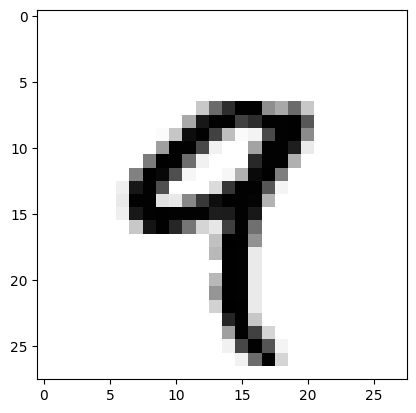

In [5]:
import matplotlib.pyplot as plt

digit = train_images[4]
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

In [15]:
train_labels[4]

np.uint8(9)

#### Manipulating tensors in NumPy

In [42]:
my_slice = train_images[10:100]
my_slice.shape

(90, 784)

In [17]:
my_slice = train_images[10:100, :, :]
my_slice.shape

(90, 28, 28)

In [18]:
my_slice = train_images[10:100, 0:28, 0:28]
my_slice.shape

(90, 28, 28)

In [19]:
my_slice = train_images[:, 14:, 14:]

In [20]:
my_slice = train_images[:, 7:-7, 7:-7]

#### The notion of data batches

In [21]:
batch = train_images[:128]

In [22]:
batch = train_images[128:256]

In [23]:
n = 3
batch = train_images[128 * n : 128 * (n + 1)]

#### Tensor reshaping

In [24]:
x = np.array([[0., 1.],
              [2., 3.],
              [4., 5.]])
x.shape

(3, 2)

In [25]:
x = x.reshape((6, 1))
x

array([[0.],
       [1.],
       [2.],
       [3.],
       [4.],
       [5.]])

In [26]:
x = x.reshape((2, 3))
x

array([[0., 1., 2.],
       [3., 4., 5.]])

In [27]:
x = np.zeros((300, 20))
x = np.transpose(x)
x.shape

(20, 300)

In [28]:
train_images = train_images.reshape((60000, 28 * 28))